In [3]:
!pip install -q ipywidgets

     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [4]:
!sudo apt-get -qq update -y
!sudo apt-get -qq install python3.11

!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 3

!python --version

^C
update-alternatives: error: alternative path /usr/bin/python3.7 doesn't exist
update-alternatives: error: alternative path /usr/bin/python3.11 doesn't exist
Python 3.8.16


In [5]:
!python --version


Python 3.8.16


In [1]:
!git clone https://github.com/Wiqzard/Deep-Deterministic-Policy-Gradient-Portfolio-Optimization.git
!mv Deep-Deterministic-Policy-Gradient-Portfolio-Optimization ddpg

Cloning into 'Deep-Deterministic-Policy-Gradient-Portfolio-Optimization'...
remote: Enumerating objects: 1478, done.
remote: Counting objects: 100% (410/410), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 1478 (delta 294), reused 347 (delta 231), pack-reused 1068
Receiving objects: 100% (1478/1478), 11.71 MiB | 14.86 MiB/s, done.
Resolving deltas: 100% (1015/1015), done.


In [1]:
!cd ddpg/ && git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/Wiqzard/Deep-Deterministic-Policy-Gradient-Portfolio-Optimization
   74fd39f..dae7280  main       -> origin/main
Updating 74fd39f..dae7280
Fast-forward
 exp/exp_fed.py | 1 -
 1 file changed, 1 deletion(-)


In [2]:
import torch
import torch.nn as nn
import sys 
import warnings
import os

if not '/content/Deep-Deterministic-Policy-Gradient-Portfolio-Optimization' in sys.path:
  print("added")
  sys.path += ['/content/Deep-Deterministic-Policy-Gradient-Portfolio-Optimization']
if not 'ddpg' in sys.path:
  print("added")
  sys.path += ['/ddpg'] 
sys.path += ['/content/ddpg'] 
sys.path += ['/content/ddpg/'] 
warnings.filterwarnings("ignore")
os.makedirs("outputs", exist_ok=True)

added
added


In [7]:
#@title Arguments

import torch
from ddpg.utils.tools import dotdict
from ddpg.utils.tools import logger


args = dotdict()
args.bb = False
args.ab = True 

args.ba = False
args.is_training = True
args.use_numeraire = False 
args.colab = True

args.conv1_out = 32  # 32
args.conv2_out = 64  # 64
args.conv3_out = 32  # 32
args.fc1_out = 64 # 128
args.sigm = True
args.reward_multiplier = 1
args.noise = "OU"  #"param", "randn"
args.sigma = 0.25
args.theta = 0.25
args.dt = 0.002
args.scalar = 0.2
args.scalar_decay = 0.992
args.desired_distance = 0.1

args.x0 = None
args.batch_size = 64
args.gamma = 0.99#99
args.tau  = 1e-2
args.max_size = 100000

args.critic_learning_rate = 1e-3
args.actor_learning_rate = 1e-4
args.chkpt_dir = "contents/outputs/ddpg"

args.episodes = 500
args.ratio = 0.8
args.benchmark_name = "UBAH"
args.compute_before = False
args.seq_len = 50

args.database_path = "outputs/coin_history.db"
args.granularity = 900
args.start_date = "2022-3-01-00-00"  #"2022-3-01-00-00"
args.end_date = "2022-4-01-00-00"

args.commission_rate_selling = 0.0025
args.commission_rate_purchasing = 0.0025

args.fill_database = True
args.with_test = True 
args.resume =  False

args.use_gpu = True
args.use_amp = False #True
args.use_gpu = bool(torch.cuda.is_available() and args.use_gpu)
logger.info("Args in experiment:")
logger.info(args)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:root:Args in experiment:
INFO:root:{'bb': False, 'ab': True, 'ba': False, 'is_training': True, 'use_numeraire': False, 'colab': True, 'conv1_out': 32, 'conv2_out': 64, 'conv3_out': 32, 'fc1_out': 64, 'sigm': True, 'reward_multiplier': 1, 'noise': 'OU', 'sigma': 0.25, 'theta': 0.25, 'dt': 0.002, 'scalar': 0.2, 'scalar_decay': 0.992, 'desired_distance': 0.1, 'x0': None, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.01, 'max_size': 100000, 'critic_learning_rate': 0.001, 'actor_learning_rate': 0.0001, 'chkpt_dir': 'contents/outputs/ddpg', 'episodes': 500, 'ratio': 0.8, 'benchmark_name': 'UBAH', 'compute_before': False, 'seq_len': 50, 'database_path': 'outputs/coin_history.db', 'granularity': 900, 'start_date': '2022-3-01-00-00', 'end_date': '2022-4-01-00-00', 'commission_rate_selling': 0.0025, 'commission_rate_purchasing': 0.0025, 'fill_database': True, 'with_test': True, 'resume': False, 'use_gpu': True, 'use_amp': False}


In [6]:
#@title Arguments2
from ddpg.utils.tools import dotdict
from ddpg.utils.tools import logger

args_fed = dotdict()
#args_fed.resume = True
args_fed.colab = True
args_fed.bb = False 
args_fed.ba = False
args_fed.ab = False
args_fed._print_train = False
args_fed.y = 1

args_fed.episodes = 500
args_fed.ratio = 0.8
args_fed.benchmark_name = "UBAH"
args_fed.compute_before = False
args_fed.seq_len = 50
args_fed.database_path = "outputs/coin_history.db"
args_fed.granularity = 900
args_fed.start_date = "2022-02-01-00-00"
args_fed.end_date = "2022-10-20-00-00"
args_fed.commission_rate_selling = 0.0025
args_fed.commission_rate_purchasing = 0.0025
# ar_fedgs.chkpt_dir = "contents/outputs/dpg"
args_fed.chkpt_dir = "outputs/dpg"


args_fed.LAMBDA1 = 1e-4 #1e-4
args_fed.LAMBDA2 = 1e-6 #1e-6
args_fed.criterion = "plain" #"plain","with_w", "with_diff"
args_fed.diff_factor = 1 #0.1
args_fed.d_model = 512 #256 512 1024 2048
args_fed.embed_type = "timef"
args_fed.hidden_size = 256# 128 256 512 
args_fed.num_layers = 2
args_fed.fc1_out = 128#, 64, 32
args_fed.fc2_out = 64 #64, 32, 16
args_fed.dropout = 0.2
args_fed.optim = "adam"
args_fed.actor_learning_rate = 1e-4

args_fed.batch_size = 32
args_fed.shuffle = False
args_fed.drop_last = False
args_fed.num_workers = 4

args_fed.use_gpu = True
args_fed.use_amp = True


logger.info("Args in experiment:")
logger.info(args_fed)

INFO:root:Args in experiment:
INFO:root:{'colab': True, 'bb': False, 'ba': False, 'ab': False, '_print_train': False, 'y': 1, 'episodes': 500, 'ratio': 0.8, 'benchmark_name': 'UBAH', 'compute_before': False, 'seq_len': 50, 'database_path': 'outputs/coin_history.db', 'granularity': 900, 'start_date': '2022-02-01-00-00', 'end_date': '2022-10-20-00-00', 'commission_rate_selling': 0.0025, 'commission_rate_purchasing': 0.0025, 'chkpt_dir': 'outputs/dpg', 'LAMBDA1': 0.0001, 'LAMBDA2': 1e-06, 'criterion': 'plain', 'diff_factor': 1, 'd_model': 512, 'embed_type': 'timef', 'hidden_size': 256, 'num_layers': 2, 'fc1_out': 128, 'fc2_out': 64, 'dropout': 0.2, 'optim': 'adam', 'actor_learning_rate': 0.0001, 'batch_size': 32, 'shuffle': False, 'drop_last': False, 'num_workers': 4, 'use_gpu': True, 'use_amp': True}


In [9]:
#@title Fill Database
from data_management.coin_database import CoinDatabase

data_base = CoinDatabase(args)
data_base.create_all_tables()
data_base.fill_all_tables(granularity=args.granularity, start_date=args.start_date, end_date=args.end_date)


In [5]:
#@title Plot OU Noise
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from ddpg.agent.noise import OUActionNoisePlain

def plot_ou_action_noise(dim_mu, sigma, theta, x0, dt, steps):
    mu = np.zeros(dim_mu)
    ou = OUActionNoisePlain(mu=mu, theta=theta, sigma=sigma, dt=dt, x0=x0)
    outputs = [ou() for _ in range(steps)] #outputs = [np.clip(output, 0, sigma) for output in outputs
    plt.figure(figsize=(20, 5), dpi=80)
    plt.title(f"mu: {mu}, sigma: {sigma}, theta: {theta}, x0: {x0}, dt: {dt}")
    #for i in range(dim_mu):
    #  plt.plot(outputs[:, i])
    plt.plot(outputs)
    plt.grid(b=None, which="major", axis="y", linestyle="--")
    plt.axhline(y=0, color="black")

interact(
    plot_ou_action_noise,
    dim_mu=(1, 10, 1),
    sigma=(0.0, 1.0, 0.01),
    theta=(0.0, 1.0, 0.01),
    x0=(0.0, 1.0, 0.01),
    dt=(0.0, 0.01, 0.0001),
    steps=(1, 5000, 1),
)


interactive(children=(IntSlider(value=5, description='dim_mu', max=10, min=1), FloatSlider(value=0.5, descript…

<function __main__.plot_ou_action_noise(dim_mu, sigma, theta, x0, dt, steps)>

In [8]:
args = args_fed

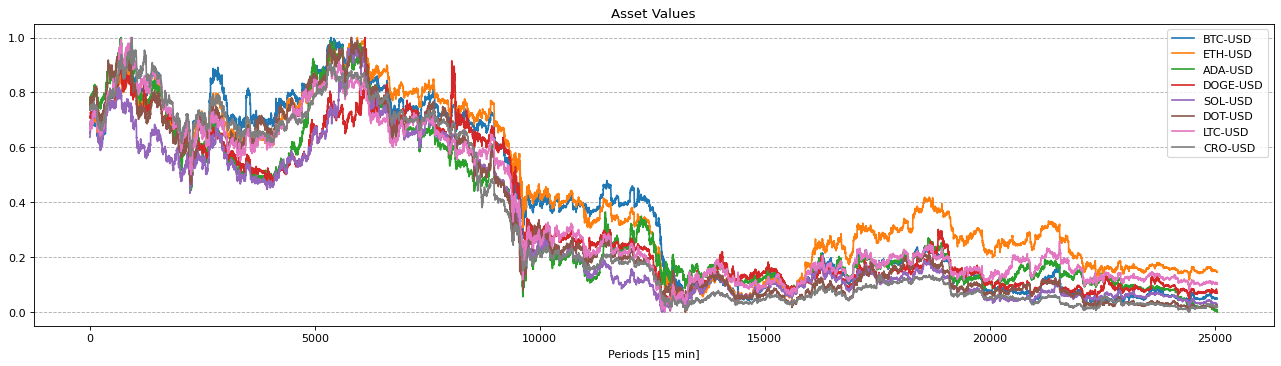

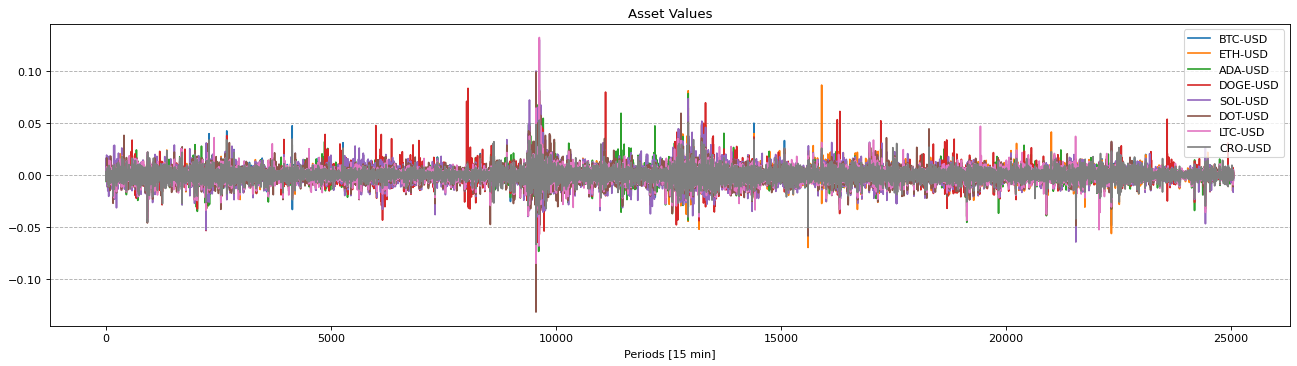

In [9]:
#@title Plot Asset Values
from data_management.data_manager import PriceHistory
from utils.visualize import plot_asset_values
price_history = PriceHistory(args, args.seq_len, args.granularity, args.start_date, args.end_date)

prices = price_history.filled_feature_matrices[0].iloc[:, :]

plot_asset_values(prices, args.granularity, scale=True, difference=False, returns=False, save_path=None)
plot_asset_values(prices, args.granularity, scale=False, difference=False, returns=True, save_path=None)

 UBAH Total Return: 0.4412 Sharpe Ratio(y): -8.18% 
 CRP Total Return: 0.3981 Sharpe Ratio(y): -9.45% 
 BM Total Return: 0.4991 Sharpe Ratio(y): -9.25% 
 UP Total Return: 0.3975 Sharpe Ratio(y): -9.46% 
 Anticor Total Return: 1.9359 Sharpe Ratio(y): 12.16% 
 OLMAR Total Return: 0.573 Sharpe Ratio(y): -2.14% 
 RMR Total Return: 0.6013 Sharpe Ratio(y): -1.57% 


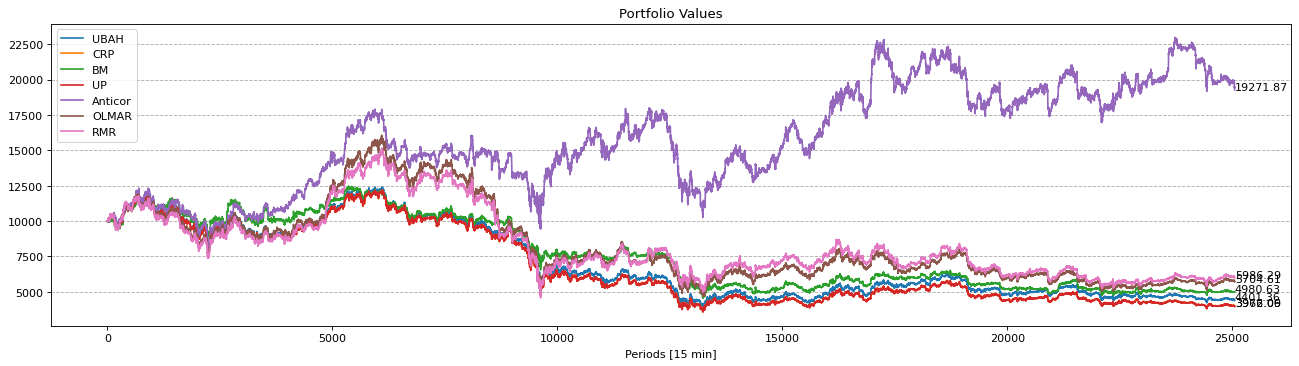

In [10]:
#@title Plot Portfolio Algorithms Without Commission
from utils.visualize import plot_portfolio_algos, plot_model
args.commission_rate_selling = 0
plot_portfolio_algos(args, flag="full")

 UBAH Total Return: 0.3823 Sharpe Ratio(y): -10.23% 
 CRP Total Return: 0.3608 Sharpe Ratio(y): -10.85% 
 BM Total Return: 0.4901 Sharpe Ratio(y): -9.57% 
 UP Total Return: 0.3607 Sharpe Ratio(y): -10.83% 
 Anticor Total Return: 0.0 Sharpe Ratio(y): -202.48% 
 OLMAR Total Return: 0.0 Sharpe Ratio(y): -114.02% 
 RMR Total Return: 0.0 Sharpe Ratio(y): -112.57% 


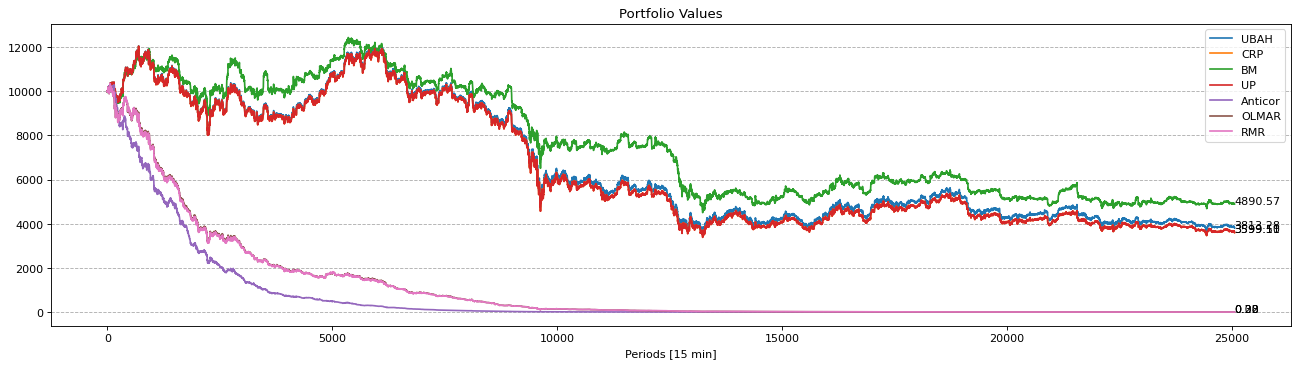

In [11]:
#@title Plot Portfolio Algorithms With Commission
args.commission_rate_selling = 0.0025
plot_portfolio_algos(args, flag="full")

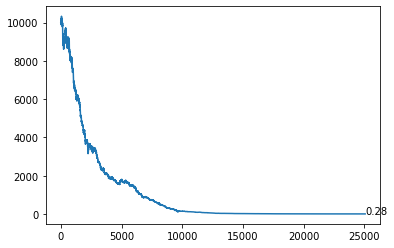

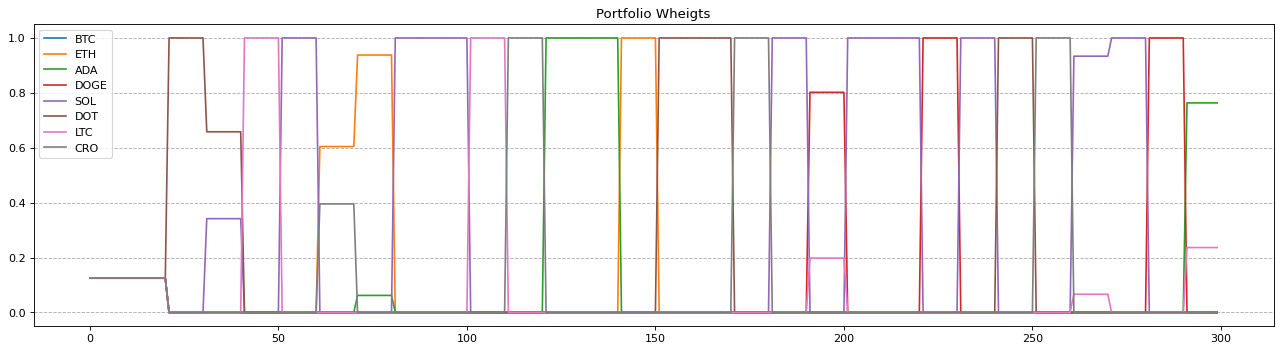

In [13]:
#@title Plot Algorithm Weights
from utils.visualize import plot_model
model_names = ["CRP", "UBAH", "BCRP", "BestMarkowitz", "UP", "Anticor", "OLMAR", "RMR"]
plot_model(args, model_name="OLMAR")

In [14]:
#@title Training2
from ddpg.exp.exp_fed import Exp_Fed
logger.info("Args in experiment:")
logger.info(args_fed)
Exp = Exp_Fed
exp = Exp(args_fed)
logger.info(f"params in exp: {exp.actor_params}")
logger.info("\n >>>>>>> start training : --- >>>>>>>>>>>>>>>>>>>>>>>>>> \n ")
graph = exp.train(with_test=True, resume=False)

INFO:root:Args in experiment:
INFO:root:{'colab': True, 'bb': False, 'ba': False, 'ab': False, '_print_train': False, 'y': 1, 'episodes': 500, 'ratio': 0.8, 'benchmark_name': 'UBAH', 'compute_before': False, 'seq_len': 50, 'database_path': 'outputs/coin_history.db', 'granularity': 900, 'start_date': '2022-02-01-00-00', 'end_date': '2022-10-20-00-00', 'commission_rate_selling': 0.0025, 'commission_rate_purchasing': 0.0025, 'chkpt_dir': 'outputs/dpg', 'LAMBDA1': 0.0001, 'LAMBDA2': 1e-06, 'criterion': 'plain', 'diff_factor': 1, 'd_model': 512, 'embed_type': 'timef', 'hidden_size': 256, 'num_layers': 2, 'fc1_out': 128, 'fc2_out': 64, 'dropout': 0.2, 'optim': 'adam', 'actor_learning_rate': 0.0001, 'batch_size': 32, 'shuffle': False, 'drop_last': False, 'num_workers': 4, 'use_gpu': True, 'use_amp': True}
INFO:root:params in exp: 3015944
INFO:root:
 >>>>>>> start training : --- >>>>>>>>>>>>>>>>>>>>>>>>>> 
 
INFO:root:Benchmark: UBAH --- Train Value: 4384.78 - Trading Periods: 19995 --- Test V

KeyboardInterrupt: ignored

In [ ]:
#@title Training
from ddpg.exp.exp_main import Exp_Main
logger.info("Args in experiment:")
logger.info(args)
Exp = Exp_Main
exp = Exp(args)
logger.info("\n >>>>>>> start training : --- >>>>>>>>>>>>>>>>>>>>>>>>>> \n ")
exp.train(with_test=True, resume=False)

In [ ]:
args = args_fed

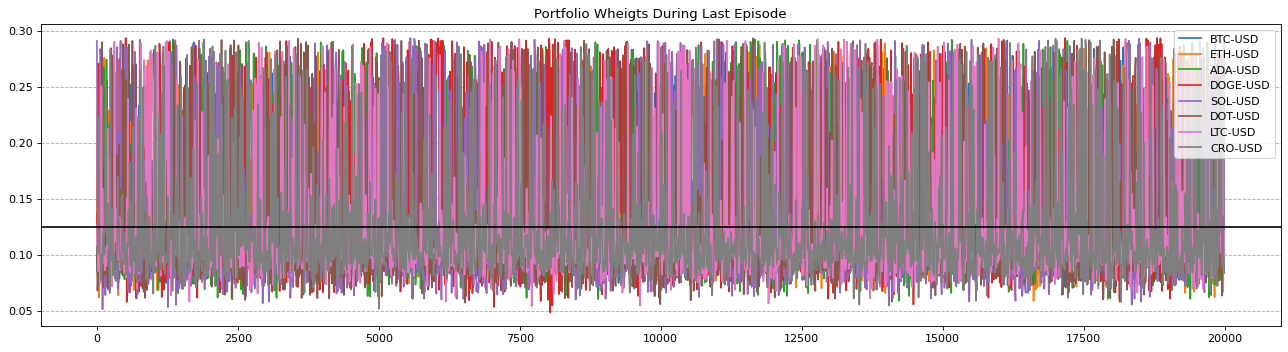

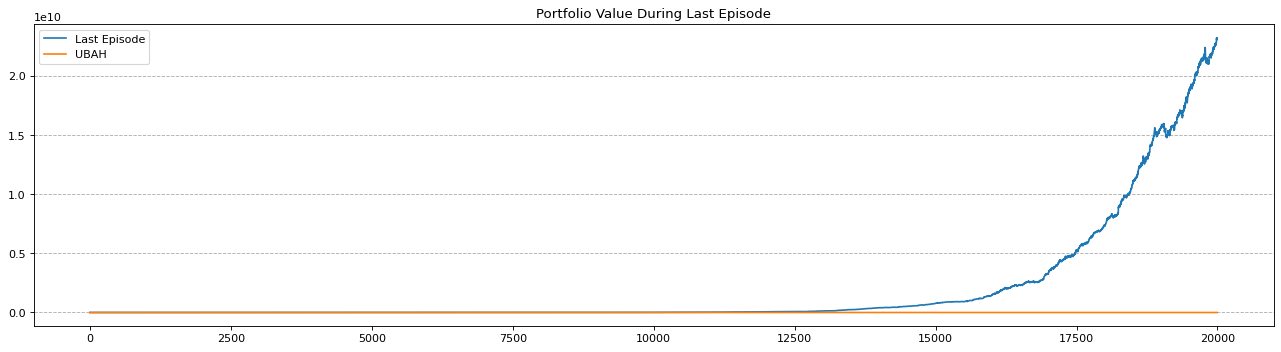

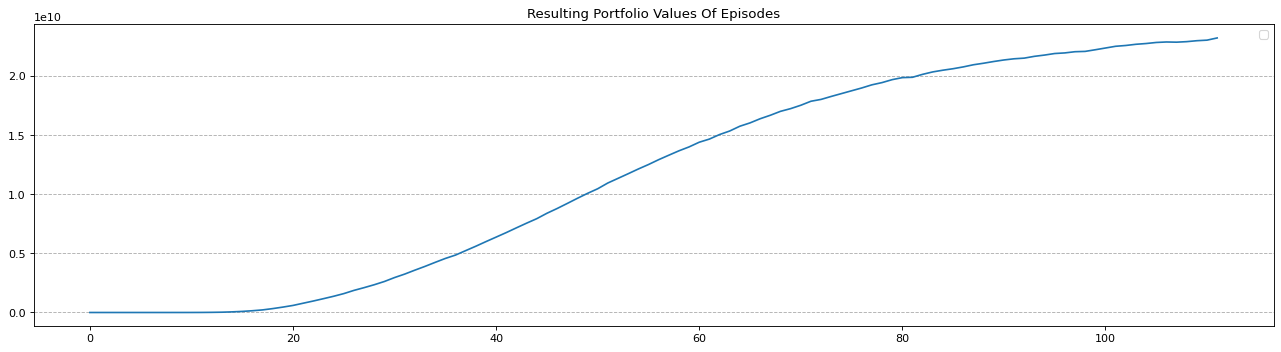

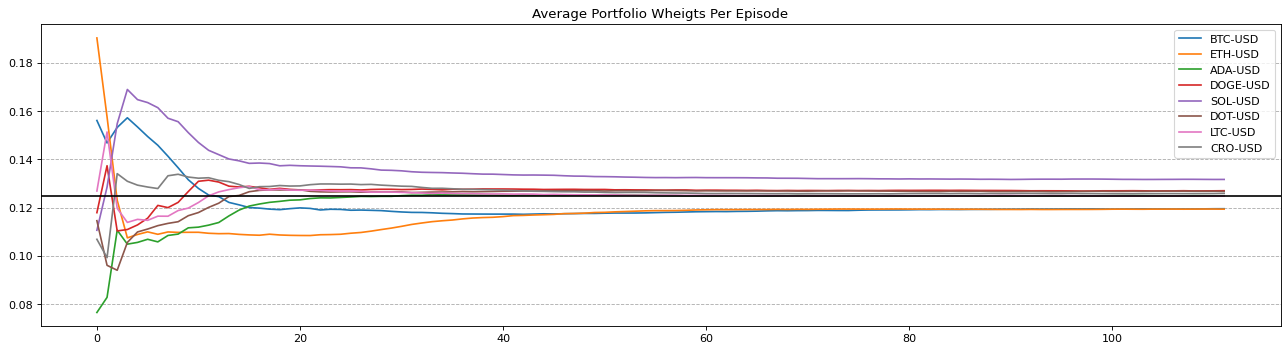

In [20]:
#@title Plot Training Results
import os
import numpy as np
from utils.visualize import plot_asset_values, plot_weights_last_backtest, plot_value_last_backtest, plot_results_episodes, plot_weight_changes_episodes
args = args_fed
path_results = "outputs/results"
if not os.listdir(path_results):
    logger.warn('The path is empty')
else:
    train_scores_episodes = np.load(os.path.join(path_results, "train_scores_episodes.npy"), allow_pickle=True)
    test_scores_episodes = np.load(os.path.join(path_results, "test_scores_episodes.npy"), allow_pickle=True)
    train_action_histories = np.load(os.path.join(path_results, "train_action_histories.npy"), allow_pickle=True)
    test_action_histories = np.load(os.path.join(path_results, "test_action_histories.npy"), allow_pickle=True)
    last_train_action_history = train_action_histories[-1]
    last_test_action_history = test_action_histories[-1]
    last_train_scores = train_scores_episodes[-1]
    last_test_scores = test_scores_episodes[-1]
    
    plot_weights_last_backtest(last_train_action_history, k=1) 
    plot_value_last_backtest(last_train_scores,args, "train", k=1 )
    plot_results_episodes(train_scores_episodes)
    plot_weight_changes_episodes(train_action_histories)

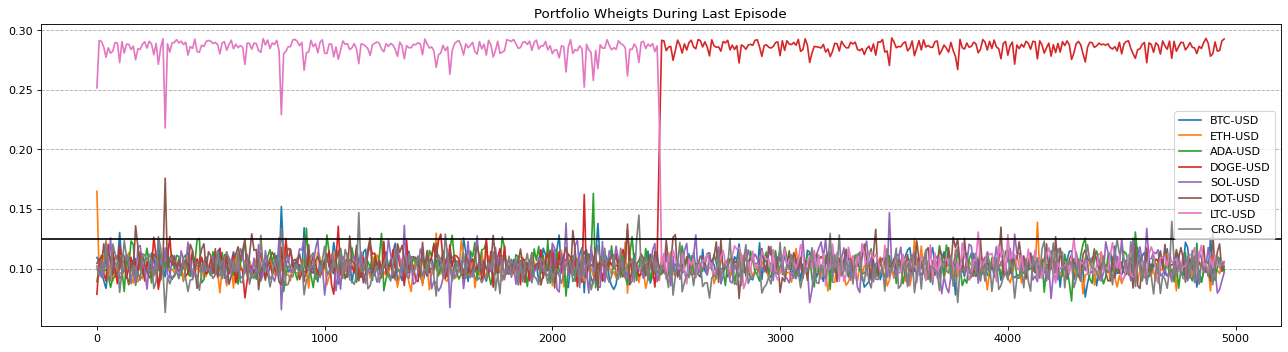

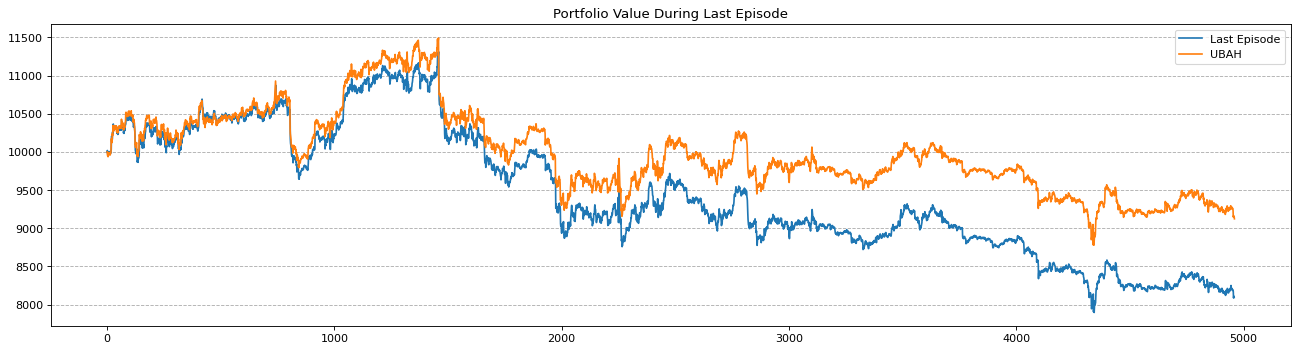

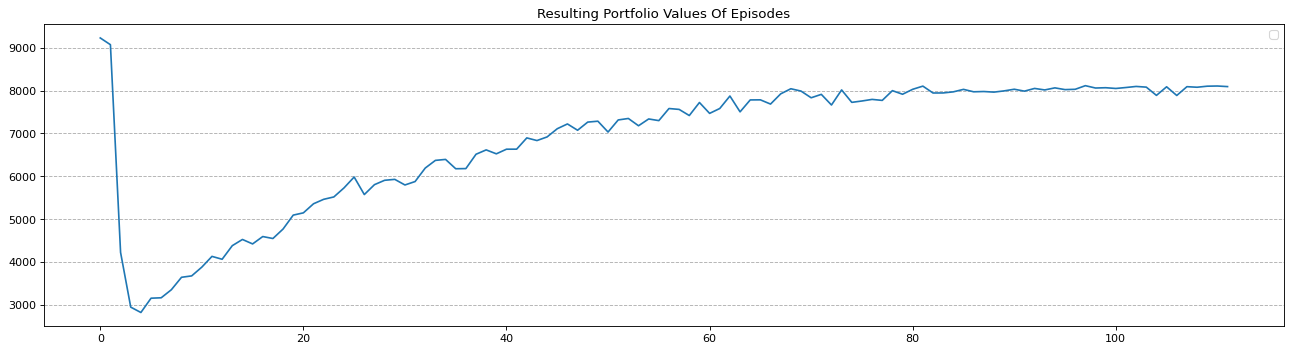

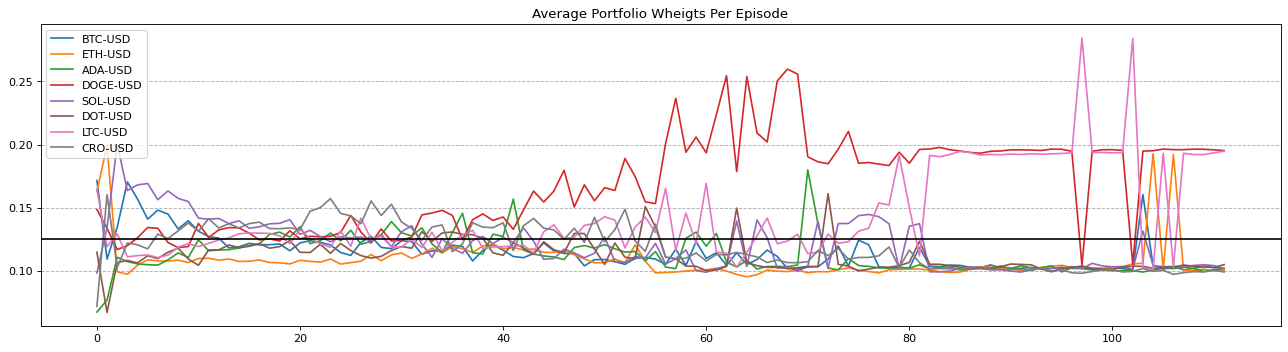

In [19]:
#@title Plot Testing Results
plot_weights_last_backtest(last_test_action_history, k=1) 
plot_value_last_backtest(last_test_scores, args, "test", k=1 )
plot_results_episodes(test_scores_episodes)
plot_weight_changes_episodes(test_action_histories)